In [50]:
from sklearn.datasets import load_breast_cancer
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
from sklearn.preprocessing import MinMaxScaler

<h1> Importing the dataset and converting it to a dataframe</h1>

In [51]:
b_c = load_breast_cancer()
print(b_c['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [52]:
df = pd.DataFrame(b_c.data,columns=b_c.feature_names)
df['class']=b_c.target
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C97CAC8220>,
      dtype=object)

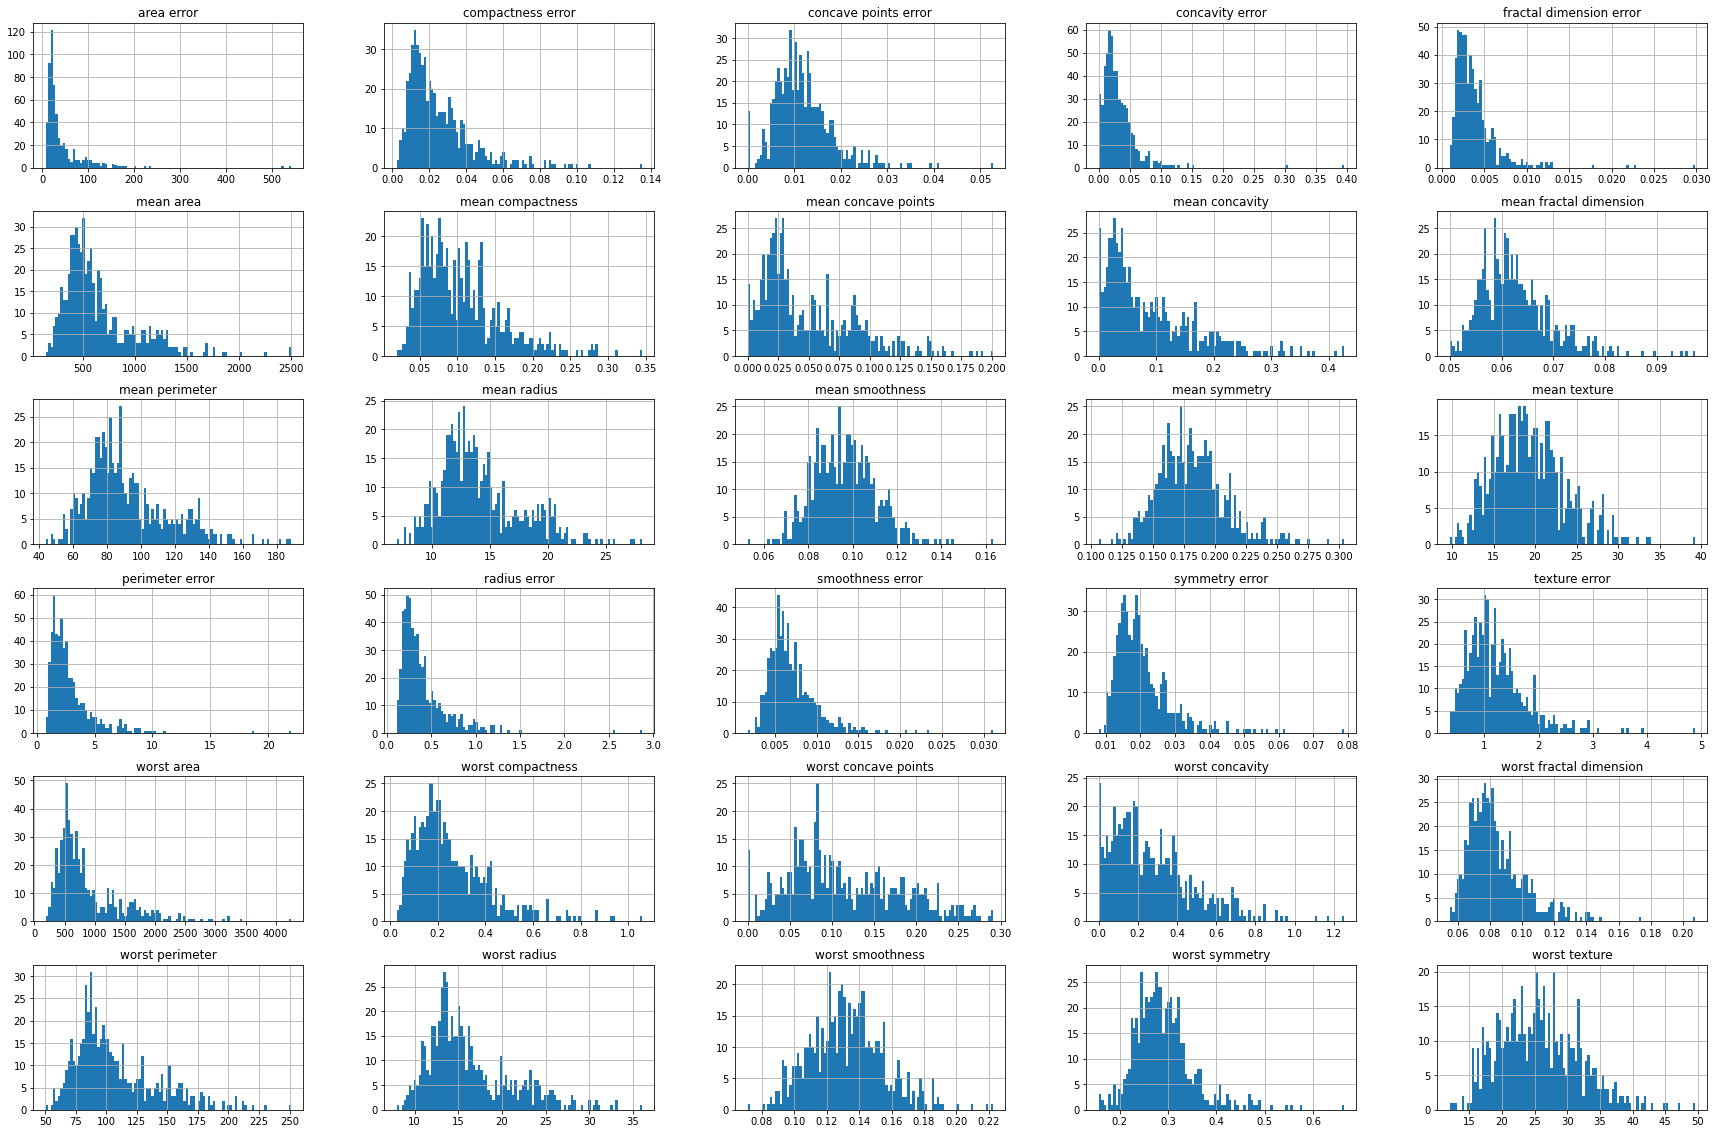

In [54]:
x=df.drop('class',axis=1)
y=df['class']
x.hist(bins=100,figsize=(30,20))

<h1> performing outlier detection,filtration and replacement </h1> 

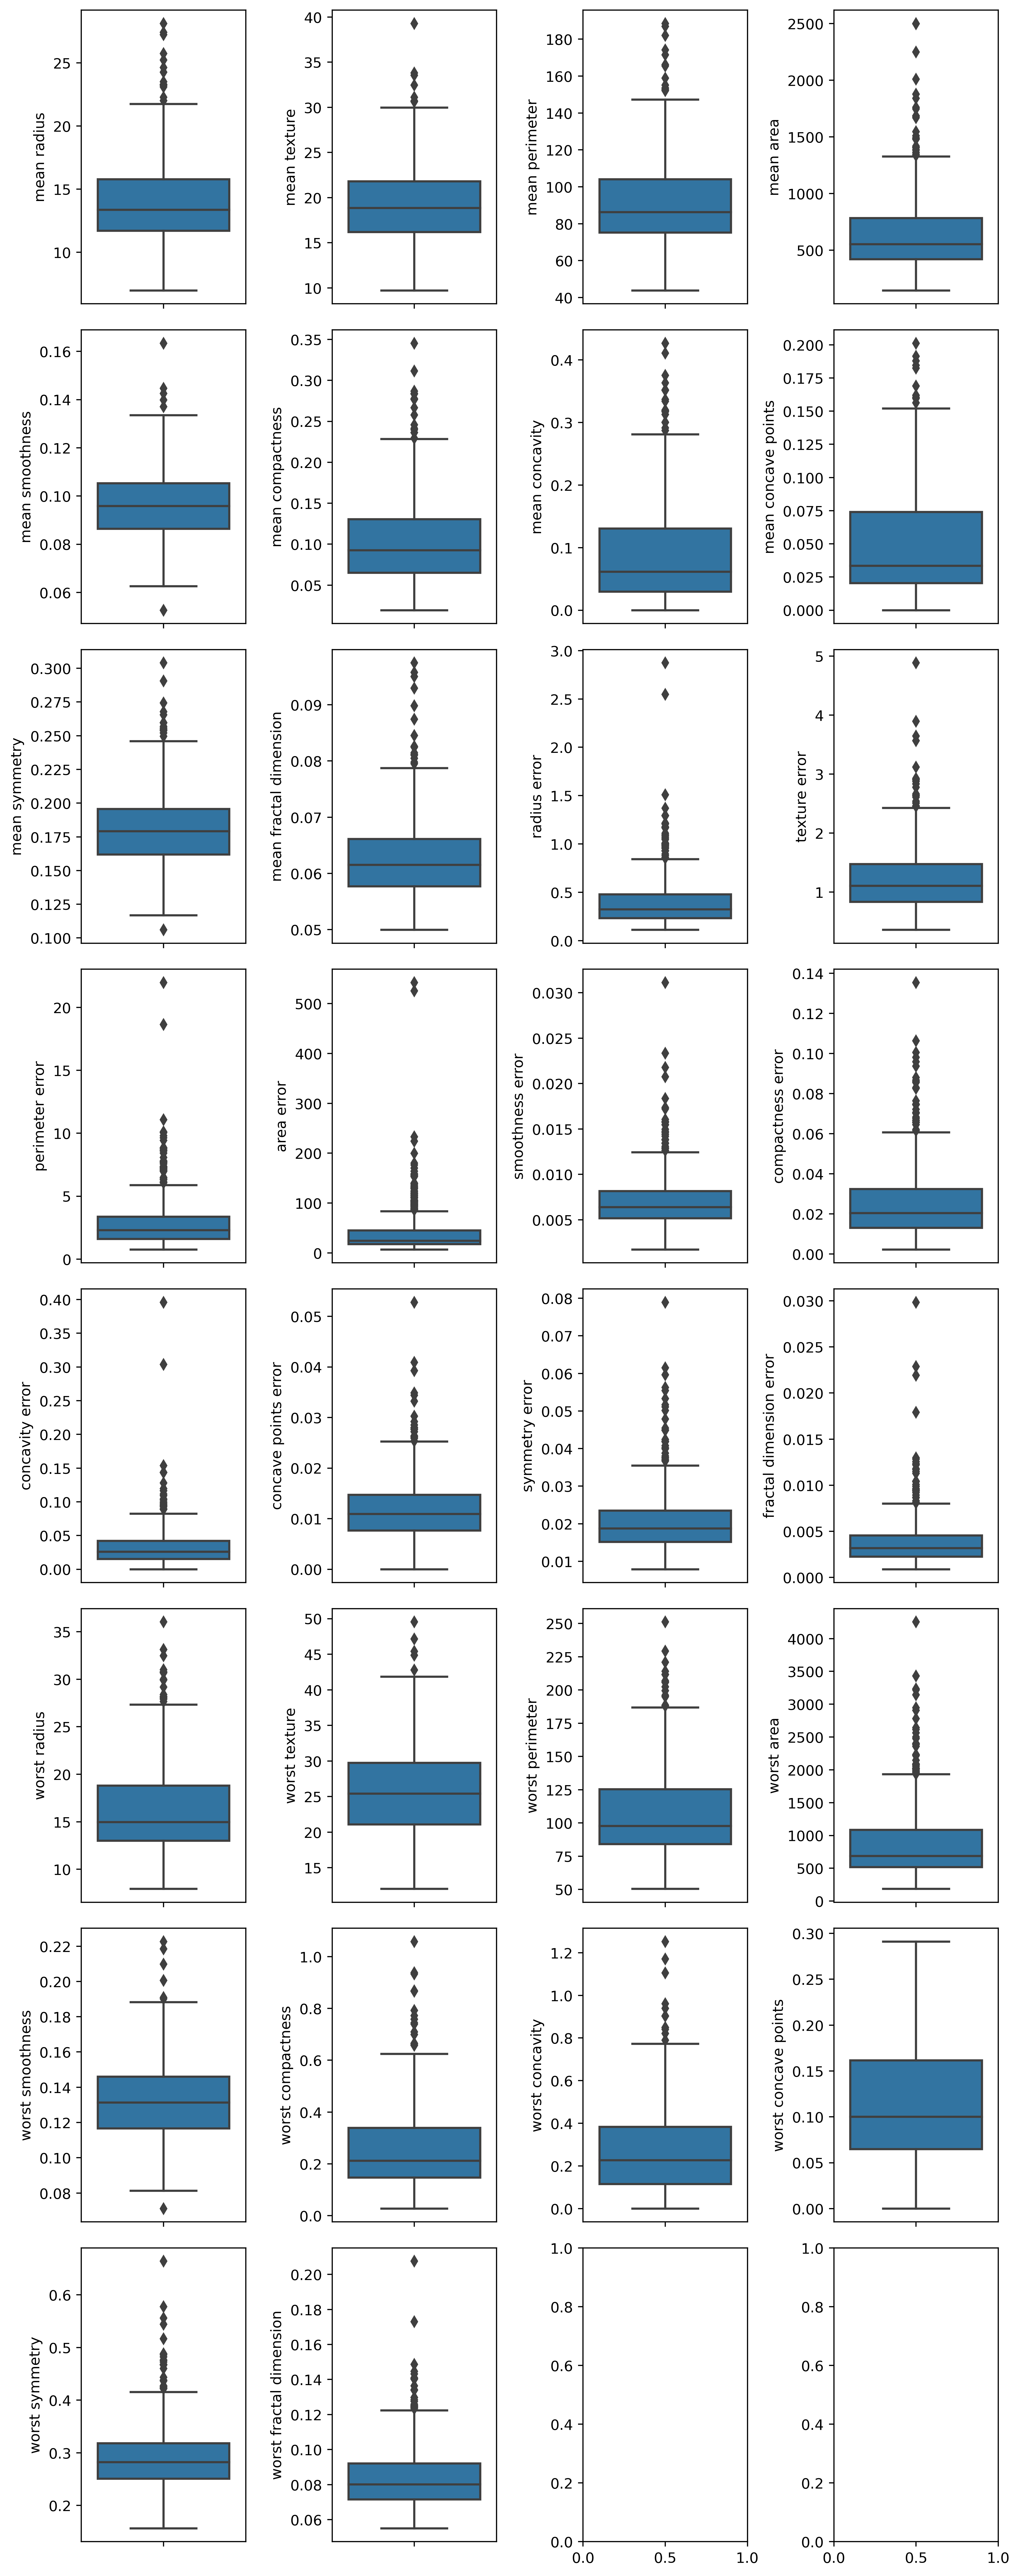

In [55]:
fig,axes=plt.subplots(8,4,figsize=(10,25),dpi=400)
i=0
k=0
for i in range(0,8):
    j=0
    while(k<x.shape[1]):
        sns.boxplot(ax=axes[i,j],data=x,y=x.columns[k])
        j=j+1
        k=k+1
        if(j>3): break
    i=i+1
plt.tight_layout()

In [56]:
def find_range(column):
    quant1,quant2 = x[column].quantile([0.25,0.75])
    iqr = quant2-quant1
    lowrange = quant2-(1.5*iqr)
    highrange = quant1+(1.5*iqr)
    return lowrange,highrange

In [57]:
def remove_outliers(column,low,hi):
    #print(low,hi)
    for i in x.index:
        if(x[column][i]<low):
            x[column][i]=low
        elif(x[column][i]>hi):
            x[column][i]=hi
        else:
            continue

In [58]:
for column in x.columns:
    low,high = find_range(column)
    print(column,"\n","low :",low,"high :",high)
    remove_outliers(column,low,high)

mean radius 
 low : 9.66 high : 17.82
mean texture 
 low : 13.355000000000002 high : 24.615000000000002
mean perimeter 
 low : 60.705000000000005 high : 118.565
mean area 
 low : 239.10000000000002 high : 963.9000000000001
mean smoothness 
 low : 0.076905 high : 0.114765
mean compactness 
 low : 0.032180000000000014 high : 0.16313999999999998
mean concavity 
 low : -0.02101 high : 0.18127000000000001
mean concave points 
 low : -0.006534999999999999 high : 0.10084499999999999
mean symmetry 
 low : 0.14499999999999996 high : 0.2126
mean fractal dimension 
 low : 0.05349 high : 0.07033
radius error 
 low : 0.10914999999999997 high : 0.60215
texture error 
 low : 0.5138499999999999 high : 1.79405
perimeter error 
 low : 0.7305000000000001 high : 4.2325
area error 
 low : 4.180000000000007 high : 58.85999999999999
smoothness error 
 low : 0.0036804999999999997 high : 0.0096345
compactness error 
 low : 0.003395000000000002 high : 0.042135
concavity error 
 low : 0.0016100000000000003 high 

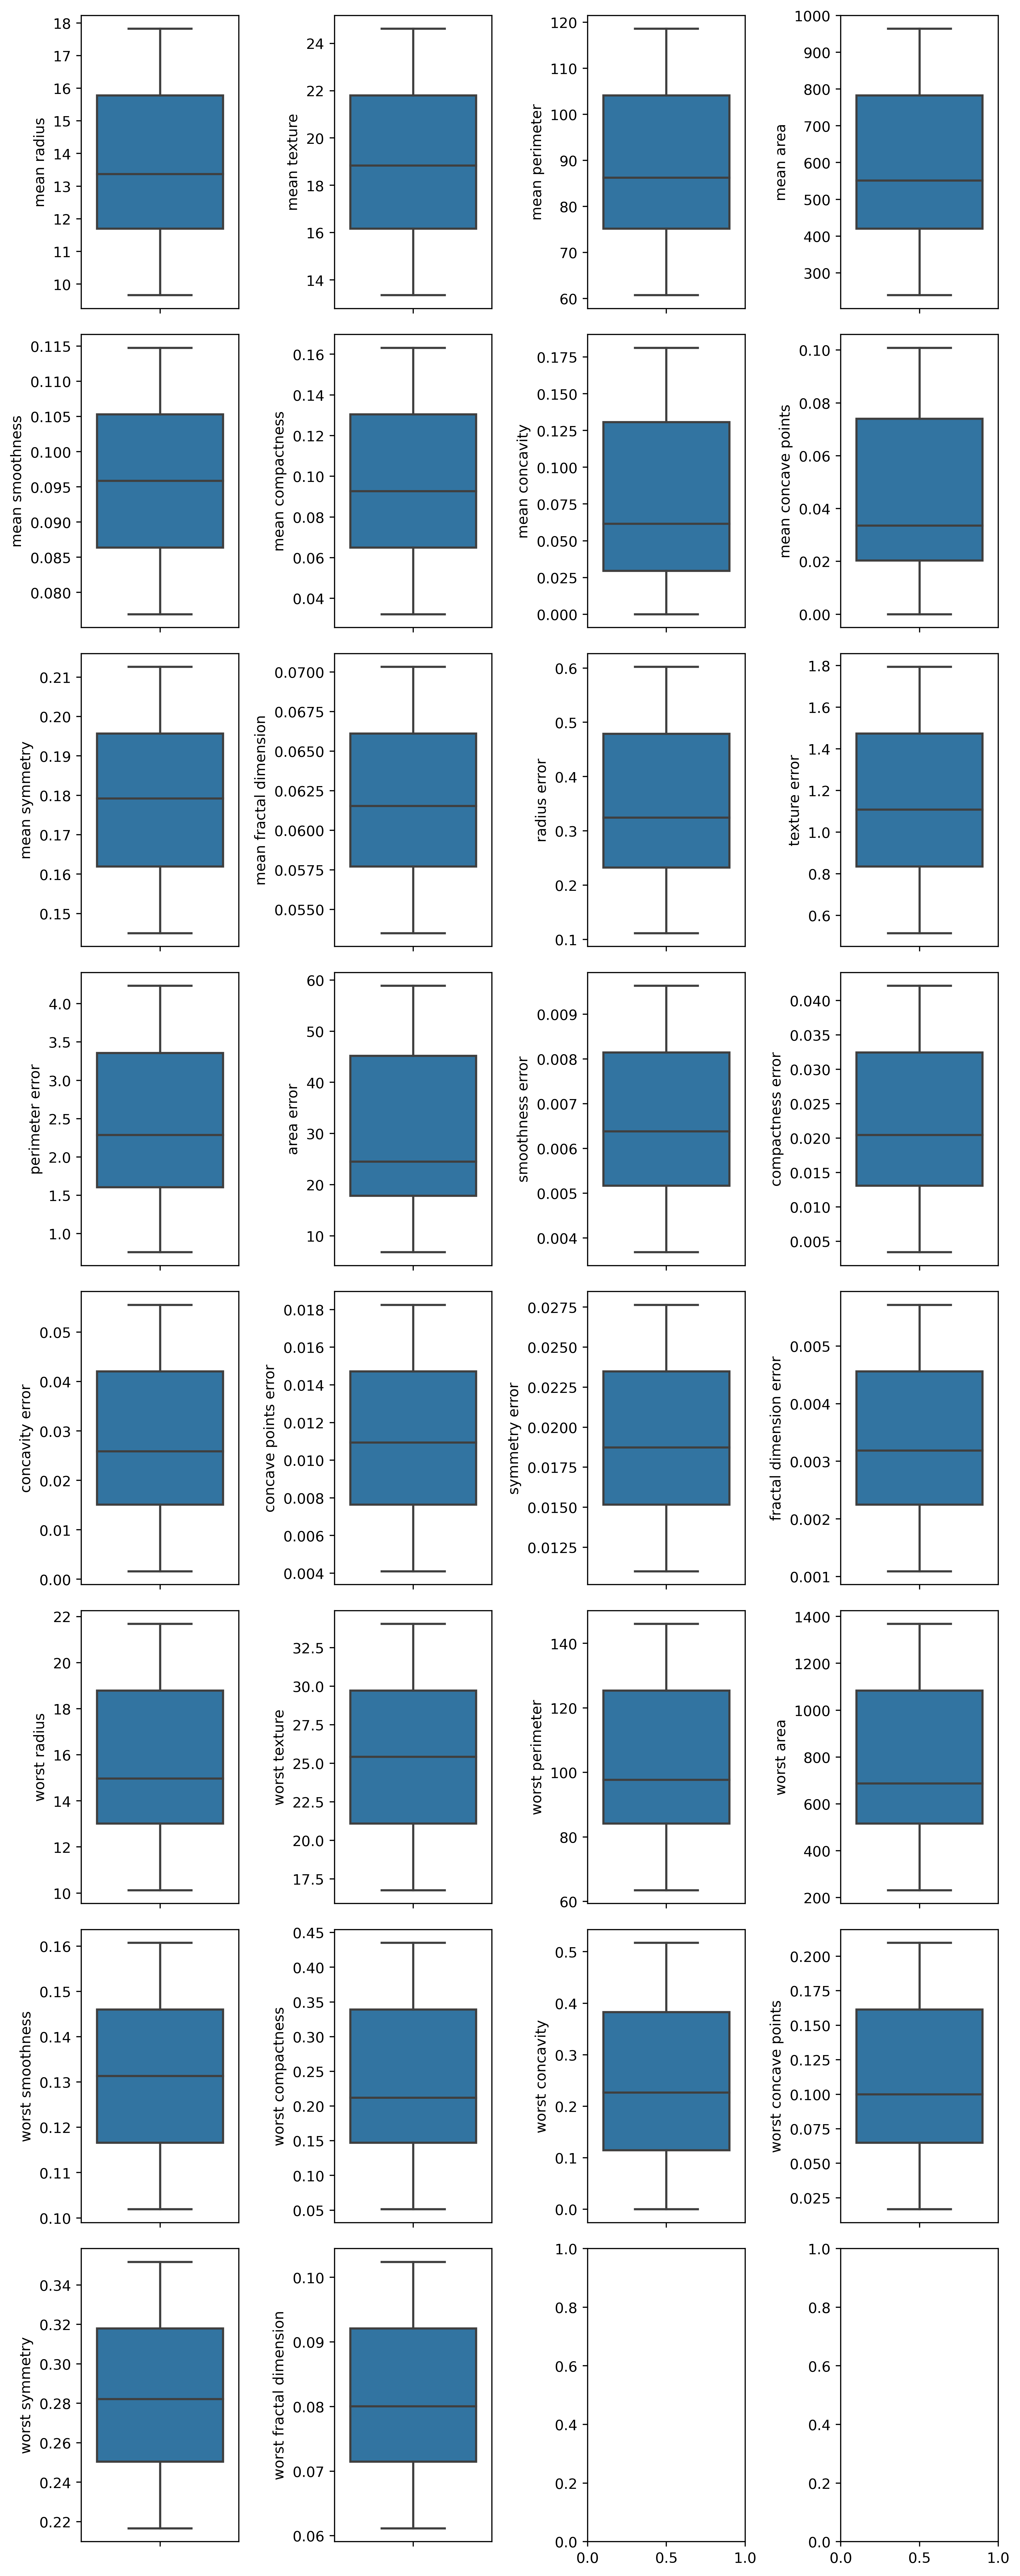

In [59]:
fig,axes=plt.subplots(8,4,figsize=(10,25),dpi=400)
i=0
k=0
for i in range(0,8):
    j=0
    while(k<x.shape[1]):
        sns.boxplot(ax=axes[i,j],data=x,y=x.columns[k])
        j=j+1
        k=k+1
        if(j>3): break
    i=i+1
plt.tight_layout()

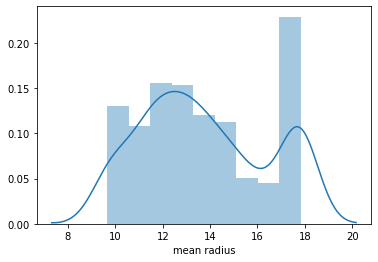

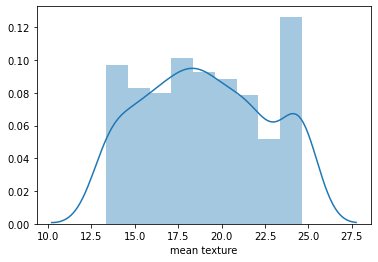

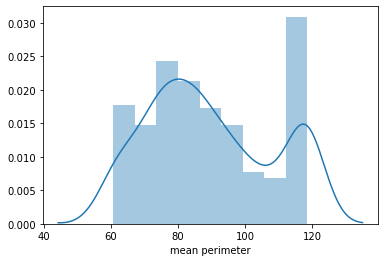

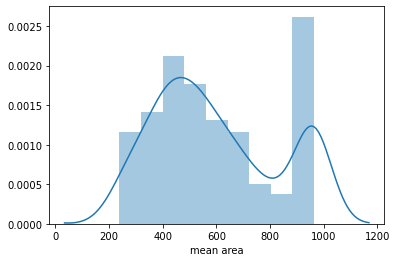

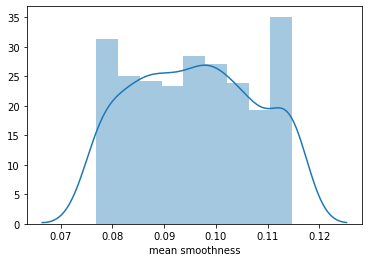

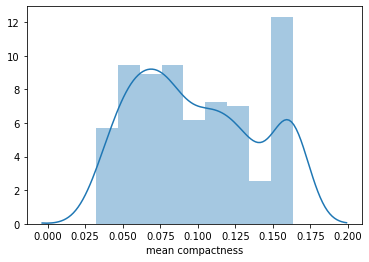

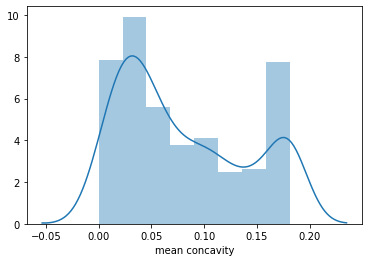

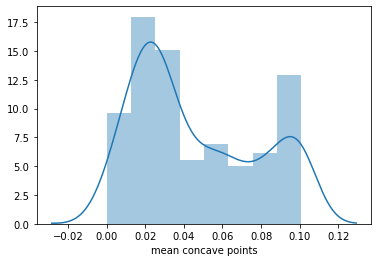

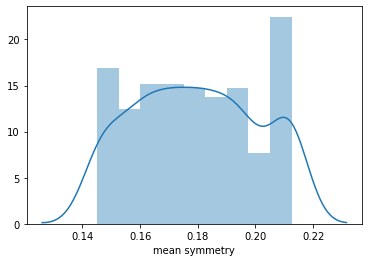

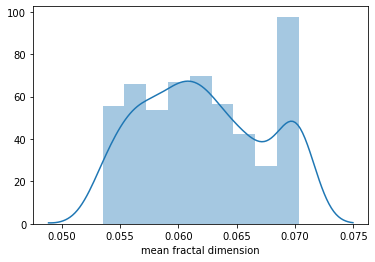

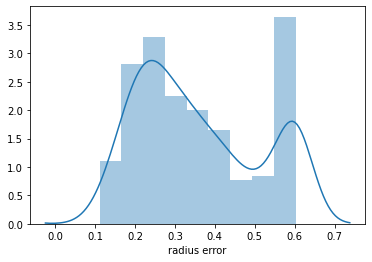

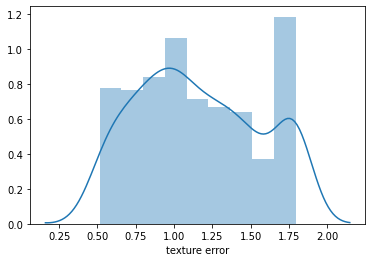

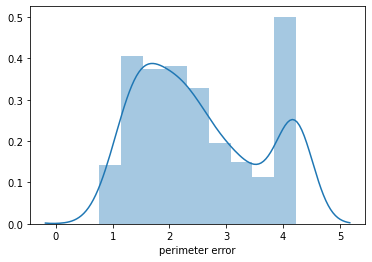

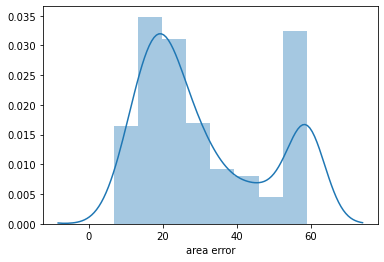

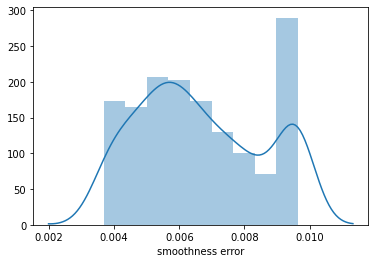

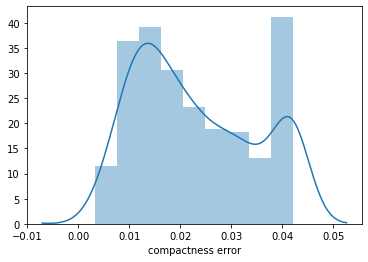

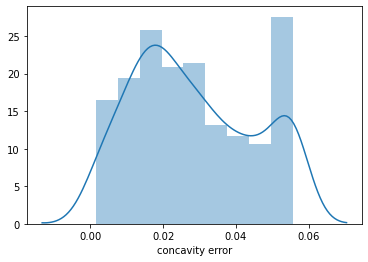

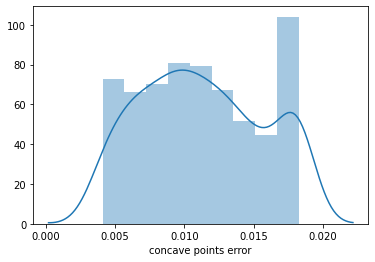

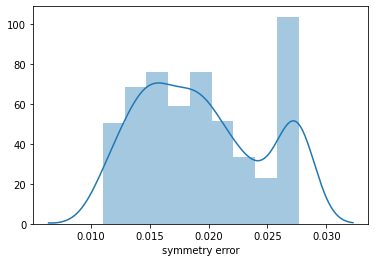

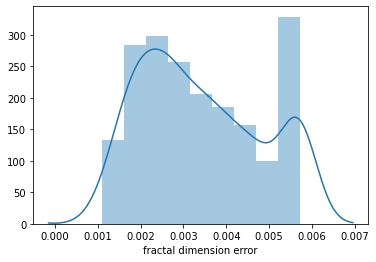

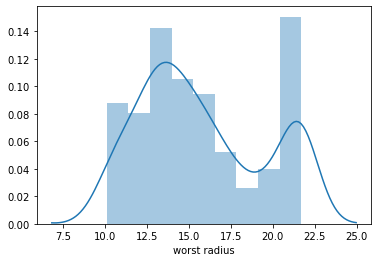

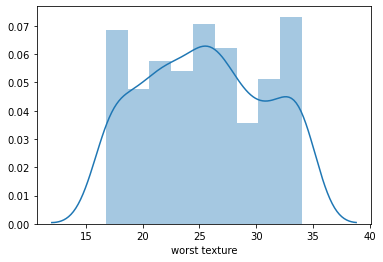

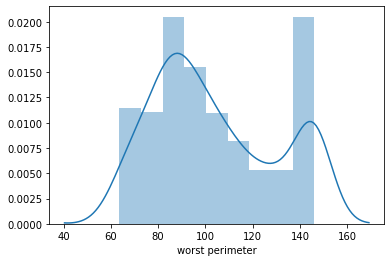

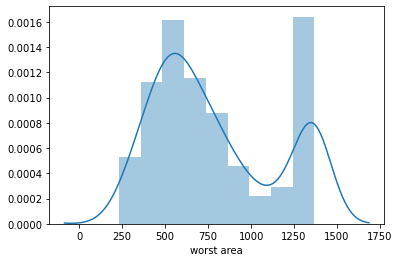

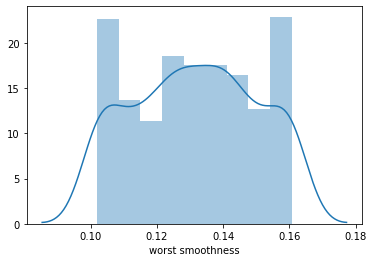

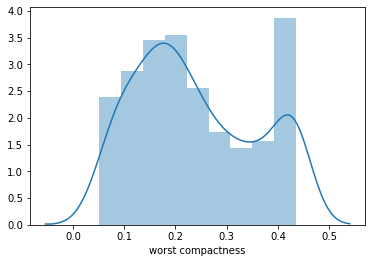

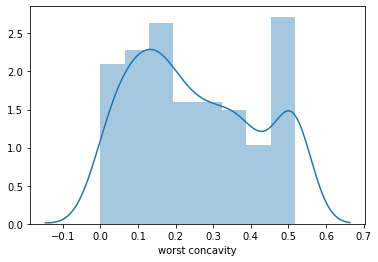

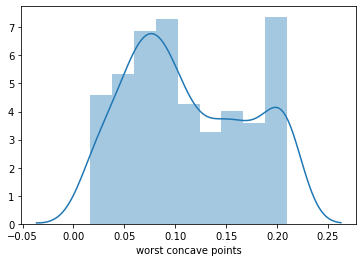

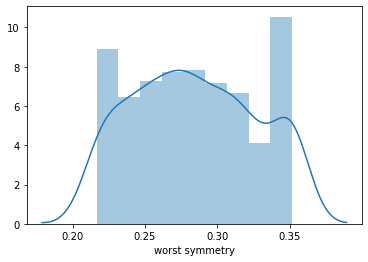

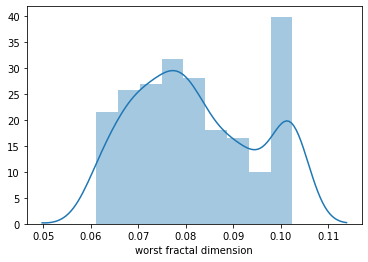

In [60]:
for column in x.columns:
    sns.distplot(x[column])
    plt.show()

<h1> dividing the data into train and test sets and testing various models </h1>

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
print("x_train.shape :", x_train.shape)
print("x_test.shape :", x_test.shape)
print("y_train.shape :", y_train.shape)
print("y_test.shape :", y_test.shape)

x_train.shape : (398, 30)
x_test.shape : (171, 30)
y_train.shape : (398,)
y_test.shape : (171,)


In [62]:
Y_train = y_train.values

In [63]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
X = pd.DataFrame(x_train)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.502808,0.497791,0.499447,0.499133,0.507339,0.508634,0.443019,0.457376,0.501572,0.505967,0.498594,0.495678,0.502375,0.459569,0.493724,0.503457,0.490585,0.502224,0.494596,0.492857,0.487559,0.490889,0.488026,0.488963,0.504927,0.486673,0.489019,0.495969,0.493741,0.500861
std,0.321194,0.310027,0.317629,0.315263,0.308996,0.299021,0.324328,0.312859,0.316308,0.303320,0.308351,0.312536,0.302730,0.327351,0.316801,0.296091,0.296497,0.300325,0.309943,0.300459,0.315141,0.307088,0.311331,0.311144,0.313972,0.301827,0.310446,0.305301,0.316003,0.308706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251225,0.237789,0.252420,0.250069,0.259773,0.264394,0.167623,0.205365,0.244453,0.249109,0.246255,0.245430,0.241476,0.205725,0.251806,0.264133,0.267897,0.270786,0.237380,0.247835,0.253676,0.237558,0.250151,0.250989,0.244898,0.253648,0.230323,0.252021,0.231111,0.250061
50%,0.447304,0.476909,0.439596,0.426807,0.505283,0.472320,0.345617,0.335862,0.505178,0.488420,0.428513,0.442236,0.423824,0.328517,0.434330,0.441533,0.456881,0.473558,0.457332,0.436688,0.414792,0.485822,0.411601,0.396562,0.516156,0.429260,0.444498,0.425832,0.476296,0.458899
75%,0.749081,0.732016,0.756481,0.745068,0.752641,0.737401,0.710404,0.743939,0.745562,0.727138,0.740650,0.742579,0.730470,0.733886,0.752519,0.739933,0.711981,0.729320,0.717398,0.737987,0.768599,0.734520,0.754541,0.758133,0.737670,0.723619,0.732450,0.749482,0.752778,0.744484
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Logistic Regression from linear_model </h2>

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [65]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
print('MSE TRAIN:',mean_squared_error(y_train,model.predict(x_train)))
print('MSE TEST :',mean_squared_error(y_test,predict))

MSE TRAIN: 0.01507537688442211
MSE TEST : 0.631578947368421


<h2> SGDClassifier from linear_model </h2>

In [66]:
from sklearn.linear_model import SGDClassifier

In [67]:
model_2 = SGDClassifier()
model_2.fit(x_train,y_train)
predict = model_2.predict(x_test)
print('MSE TRAIN:',mean_squared_error(y_train,model_2.predict(x_train)))
print('MSE TEST :',mean_squared_error(y_test,predict))

MSE TRAIN: 0.01507537688442211
MSE TEST : 0.631578947368421


<h2> Hand written code for logistic Regression </h2>

In [68]:
def sigmoid(x):
    g = 1/(1+np.exp(-x))
    return g

In [69]:
def compute_cost(x,y,w,b):
    m,n=x.shape
    z = np.dot(x,w)+b
    total_cost=0
    f_wb = sigmoid(z)
    for i in range(0,m):
        loss = ((-y[i])*np.log(f_wb[i]))-((1-y[i])*(np.log(1-f_wb[i])))
        total_cost+=loss
    total_cost = total_cost/m
    return total_cost

In [70]:
m, n = x_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, Y_train, initial_w, initial_b)
print("cost at initial w and b : ",cost)

cost at initial w and b :  0.6931471805599467


In [71]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0 
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*X[i,j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb-y[i])*(X[i][j])
            dj_dw[j]+=dj_dw_ij 
            
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [72]:
def gradient_descent(x,y,w,b,num_iters,cost_function,compute_gradient,alpha):
    m,n = x.shape
    w_history = []
    J_history=[]
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        temp=np.zeros(n)
        for j in range(n):
            temp[j] = w[j] - alpha * dj_dw[j]
        w = temp
        b = b-alpha * dj_db
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print('iternation',i,'cost'+':',cost_function(x,y,w,b))
    return w, b, J_history, w_history 

In [73]:
initial_w = np.zeros(n)
initial_b = 0
iterations = 3000
alpha = 0.01
#scaler = StandardScaler()
#X_norm = scaler.fit_transform(x_train)
w,b,J_hist,w_hist=gradient_descent(x_train,Y_train,initial_w,initial_b,iterations,compute_cost,compute_gradient,alpha)
print(w,b)

iternation 0 cost: 0.6923437925633867
iternation 300 cost: 0.5284196837561842
iternation 600 cost: 0.4437001999355725
iternation 900 cost: 0.3915485120552179
iternation 1200 cost: 0.3553262183099971
iternation 1500 cost: 0.3281268653981844
iternation 1800 cost: 0.30662166370732047
iternation 2100 cost: 0.28900180655038804
iternation 2400 cost: 0.274188951681476
iternation 2700 cost: 0.2614924258740697
[-0.1576501  -0.12773077 -0.2263884  -0.18613788  0.01479101 -0.30199684
 -0.84940188 -0.77383586 -0.01548572  0.67435093 -0.36492398  0.6031652
 -0.33085756 -0.6525612   0.57891446  0.18230775  0.06206096 -0.07288235
  0.81056914  0.30481936 -0.40026634 -0.19220122 -0.41802387 -0.4143604
 -0.17382952 -0.29955736 -0.48758971 -0.60156941 -0.07163668  0.08838257] 2.1999216782297966
